<h1>Job Market: Deep Dive Analysts Role in Job Market</h1>

How does the salary as an analyst differs in various industry? Which skills are mostly wanted by the market for the analyst position?

We will look at the position, skill, industry, and avg_salary data for Analyst 

Step 1: Load the Data. Data contains 1796 rows and 13 columns
Step 2: Remove Duplicated Rows. Data contains 129 duplicated rows. Removing the rows to ensure data uniqueness
Step 3: Remove Data with 5 nan values within a row. Data contains 1666 rows.
Step 3: Inspecting Missing Value. Heatmap belows showing the distribution of missing value accross the dataset.
Columns priortize to be handled: Min_Salary, Max_Salary, Avg_Salary (numerical variable)


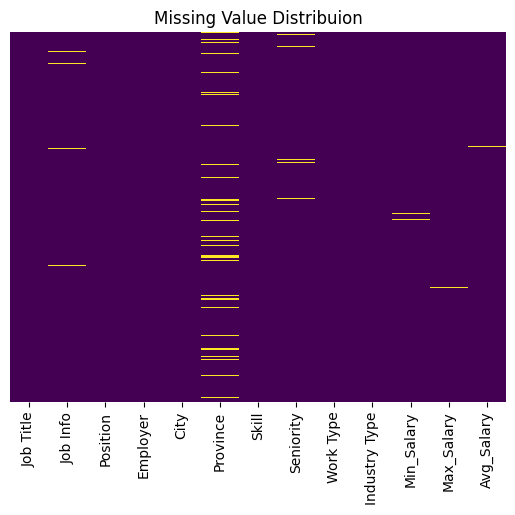

In [81]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#load data
job = pd.read_csv('job_market_insight.csv', encoding='latin-1') #file was encoded using latin-1
print(f'Step 1: Load the Data. Data contains {len(job)} rows and {len(job.columns)} columns')

#find out about duplicated data within the dataset
print(f'Step 2: Remove Duplicated Rows. Data contains {job.duplicated().sum()} duplicated rows. Removing the rows to ensure data uniqueness')

#drop all and keep first value since we want to collect unique data to see the salary distribution accross several roles and companies
job.drop_duplicates(inplace=True)

#remove rows with too many missing values, we set threshold that 9 out of 13 of the data must be filled in 
job.dropna(thresh=9, axis=0, inplace=True)
print(f'Step 3: Remove Data with 5 nan values within a row. Data contains {len(job)} rows.')

#inspect missing value 
print(f'Step 3: Inspecting Missing Value. Heatmap belows showing the distribution of missing value accross the dataset.')
sns.heatmap(job.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Distribuion')
print('Columns priortize to be handled: Min_Salary, Max_Salary, Avg_Salary (numerical variable)')




Step 4: Fill in Salary missing values


Text(0.5, 1.0, 'Missing Value Distribuion after Handling')

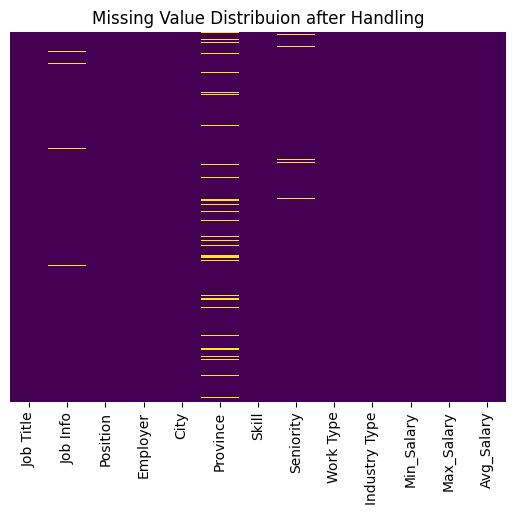

In [82]:
#fill in salary missing values
print('Step 4: Fill in Salary missing values')
#remove currency strings
def remove_currency(salary):
    return salary.str.replace('$', '', regex=False)

#apply the function to the salary columns
salary_columns = ['Min_Salary', 'Max_Salary', 'Avg_Salary']
job[salary_columns] = job[salary_columns].apply(remove_currency)

#fill in the salary by looking up the mean salary with the same job title, seniority, employer
def fill_salary(row_missing, salary_type):
    jobn = job[job[salary_type].notna()]
    same_title = jobn[jobn['Job Title']==row_missing['Job Title']]
    same_seniority = same_title[same_title['Seniority']==row_missing['Seniority']]
    same_company = same_seniority[same_seniority['Employer']==row_missing['Employer']]
    if len(same_company) >0: #look up data with the same title, seniority, and employer
        return pd.to_numeric(same_company[salary_type]).mean()
    elif len(same_seniority)>0: #look up data with the same title, and seniority
        return pd.to_numeric(same_seniority[salary_type]).mean()
    else:
        return pd.to_numeric(same_title[salary_type]).mean() #look up data with the same title

#handling minimum salary missing value
for index, row in job[job['Min_Salary'].isna()].iterrows():
    job.loc[index,'Min_Salary'] = fill_salary(row,'Min_Salary')

#handling maximum salary missing value
for index, row in job[job['Max_Salary'].isna()].iterrows():
    job.loc[index,'Max_Salary'] = fill_salary(row,'Max_Salary')

#handling average salary missing value
for index, row in job[job['Avg_Salary'].isna()].iterrows():
    job.loc[index,'Avg_Salary'] = fill_salary(row,'Avg_Salary')

#handling missing 


sns.heatmap(job.isna(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Distribuion after Handling')

Step 5. Identifying Outlier
5.1. Looking at the Job Title Data


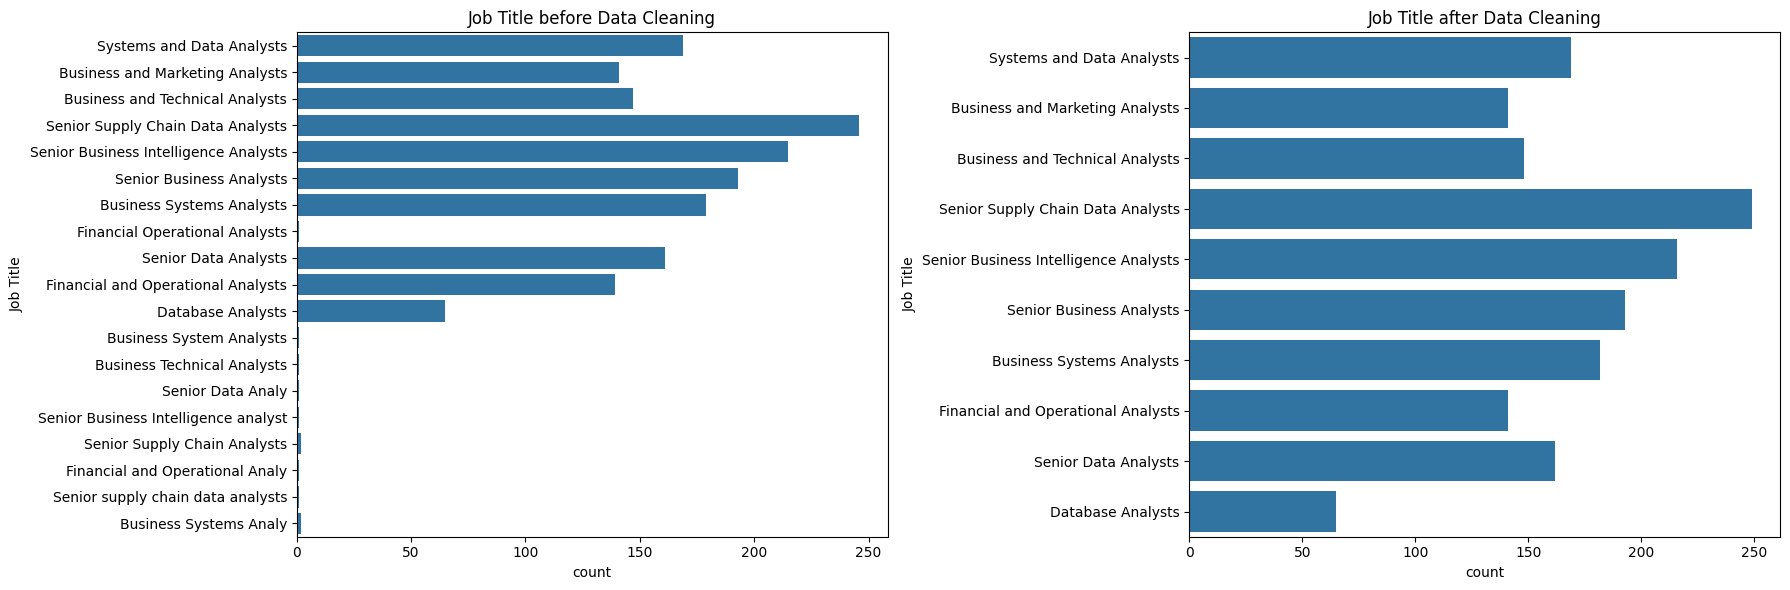

In [83]:
#value inspection, identifying outliers
print(f'Step 5. Identifying Outlier')

#we will look at the distribution of data for Job Title, Position, Skill, Industry Type, Work Type, and Salary
print('5.1. Looking at the Job Title Data')
#Job Title Data Inspection
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.countplot(data=job, y='Job Title', stat='count', ax=ax[0] )
ax[0].set_title('Job Title before Data Cleaning')

#from the plot we can see there are some misstyped and different styling of capitalization
#therefore data needs to be fixed

#Get the value counts for 'Job Title'
title_counts = job['Job Title'].value_counts()

#Filter titles that has some missed types
titles_typos = title_counts[title_counts < 5].index


#fixing the typos in a form of dictionary
fixed_typos = ['Senior Supply Chain Data Analysts', 'Business Systems Analysts',
       'Financial and Operational Analysts', 'Business Systems Analysts',
       'Business and Technical Analysts', 'Senior Data Analysts',
       'Senior Business Intelligence Analysts',
       'Financial and Operational Analysts', 'Senior Supply Chain Data Analysts']
fixed_titles = dict(zip(titles_typos, fixed_typos))

#fixing the typos by replacing values based on key and index
job['Job Title'] = job['Job Title'].replace(fixed_titles)

#re-plot the data
sns.countplot(data=job, y='Job Title', stat='count', ax=ax[1])
ax[1].set_title('Job Title after Data Cleaning')
plt.tight_layout()

5.2 Looking at the Posiition Data


Text(0.5, 1.0, 'Position')

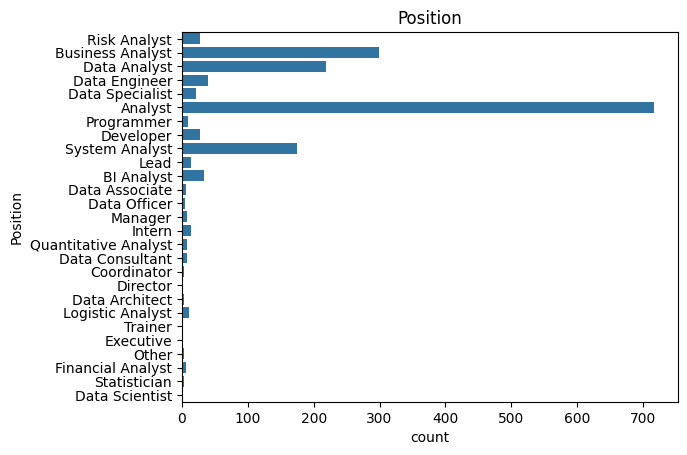

In [86]:
#looking at the analyst position
print('5.2 Looking at the Posiition Data')
sns.countplot(data=job, y='Position', stat='count')
plt.title('Position')

#from this graph we can see there are a lot of 'Analyst' position in the market
#no data cleaning is needed

In [88]:
#looking at the Skill data, there are inconsistency and duplication within the data, therefore we will clean it
print('5.3 Looking at the Skill')
#steps to clean skill: make it uppercase -> remove white space before comma -> make it as a list -> make it as a set
#set to remove duplicate
job['skill_clean'] = job.apply(lambda row: set(list(row.Skill.upper().replace(', ',',').split(','))), axis = 1)

#count how many unique skills
job['count_skill'] = job.apply(lambda row: len(row.skill_clean), axis=1)

job.head(3)

5.3 Looking at the Skill


,Job Title,Job Info,Position,Employer,City,Province,Skill,Seniority,Work Type,Industry Type,Min_Salary,Max_Salary,Avg_Salary,skill_clean,count_skill
0,Systems and Data Analysts,Binance Accelerator Program - Data Analyst (Risk),Risk Analyst,Binance,Remote,NaN,"Python, Sql",ANY,Remote,Others,76000,89440,82720,"{PYTHON, SQL}",2
1,Business and Marketing Analysts,Business Analyst,Business Analyst,Canadian Nuclear Laboratories,Remote,NaN,"Power Bi, Power BI, Excel",ANY,Remote,Others,65000,87000,76000,"{POWER BI, EXCEL}",2
2,Business and Technical Analysts,Geophysicist/Data Analyst,Data Analyst,Sander Geophysics Limited,Ottawa,ON,Undef,ANY,In-Person,Technology,64123.59,86600,75361.795,{UNDEF},1


In [90]:
print('5.4 Looking at the Work Type')
job['Work Type'].value_counts()

#no data cleaning is needed

5.4 Looking at the Work Type


Work Type
In-Person    1528
Remote        116
Hybrid         20
Name: count, dtype: int64

5.5 Looking at the Industry Type


Text(0.5, 1.0, 'Industry Type after Data Cleaning')

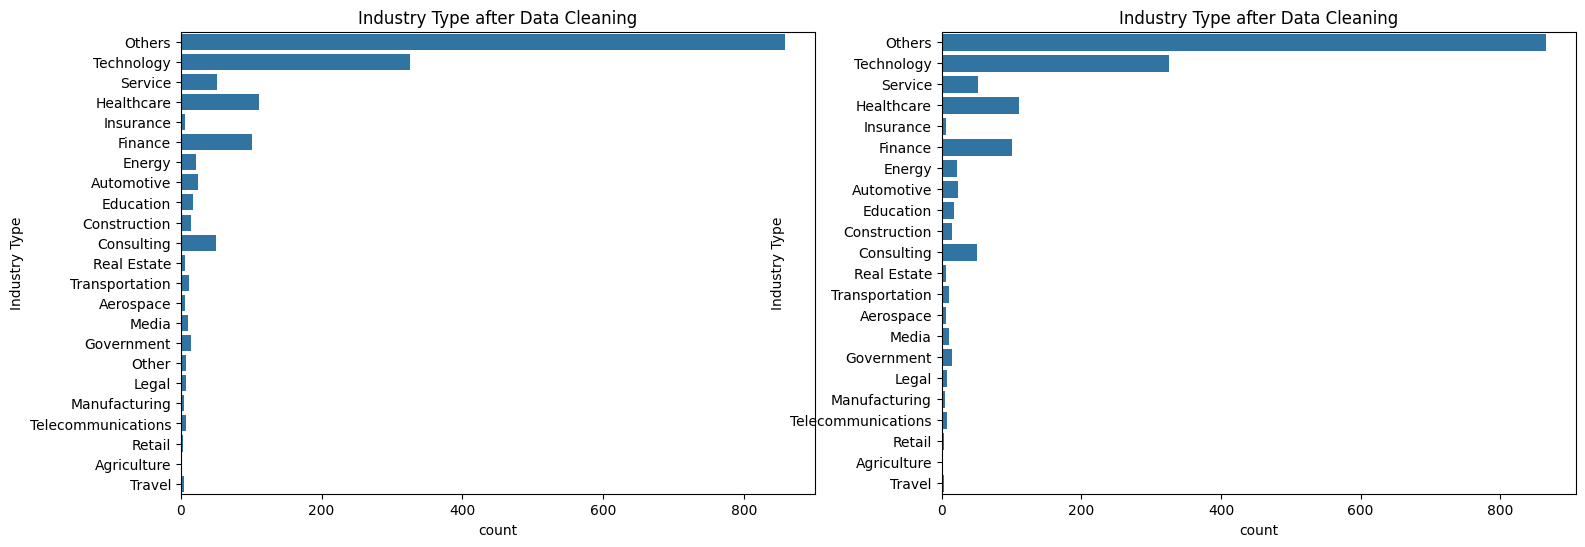

In [93]:
print('5.5 Looking at the Industry Type')
job['Industry Type'].value_counts()

#we will replace Other into Others to make it consitent
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.countplot(data=job, y='Industry Type', stat='count', ax=ax[0] )
ax[0].set_title('Industry Type after Data Cleaning')

job.loc[:,'Industry Type'] = job.loc[:,'Industry Type'].replace('Other','Others')

sns.countplot(data=job, y='Industry Type', stat='count', ax=ax[1] )
ax[1].set_title('Industry Type after Data Cleaning')

5.6 Looking at the Salary Data
         Min_Salary     Avg_Salary     Max_Salary
count  1.666000e+03    1666.000000    1666.000000
mean   6.969626e+04   78887.930915   88515.493825
std    3.281445e+04   17973.659950   20345.611878
min   -8.736000e+04      62.500000       1.000000
25%    6.000000e+04   70000.000000   80000.000000
50%    6.827450e+04   77750.000000   87000.000000
75%    8.000000e+04   88587.200000   93600.000000
max    1.160000e+06  158640.000000  180000.000000


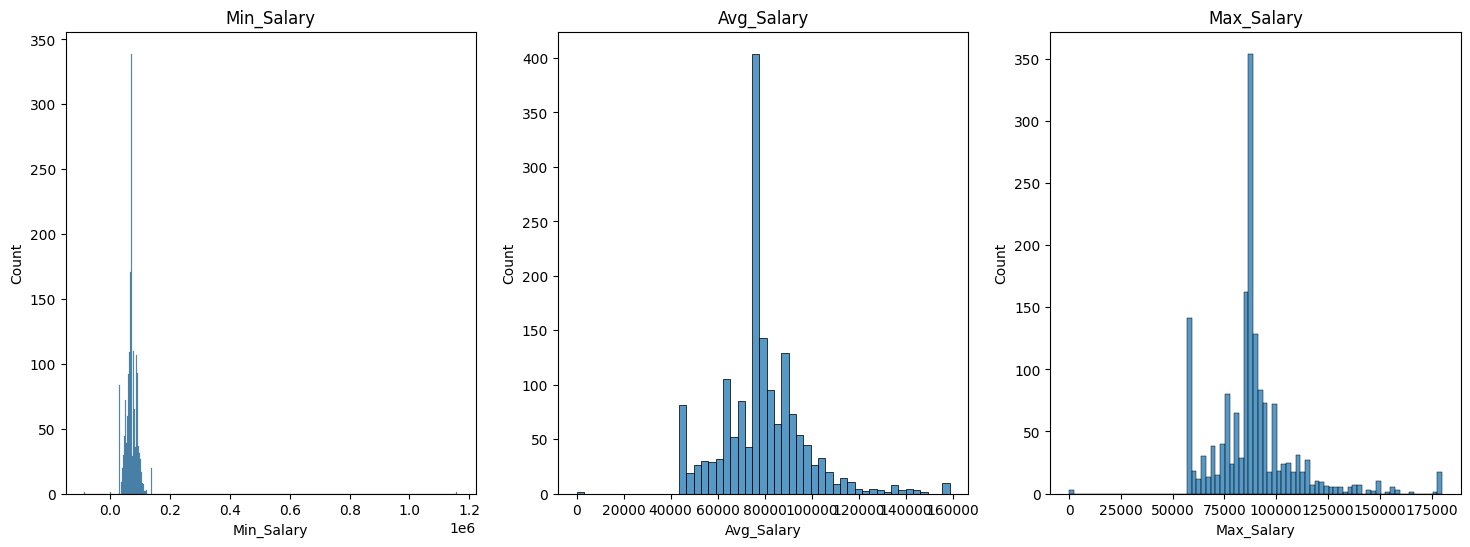

In [106]:
print('5.6 Looking at the Salary Data')
print('Before Data Cleaning')
#change data type object to numeric
salary = ['Min_Salary','Avg_Salary','Max_Salary']
job[salary]=job[['Min_Salary','Avg_Salary','Max_Salary']].apply(pd.to_numeric)

#plot data distribution
fig, ax = plt.subplots(1,3, figsize=(18,6))
for i in range(3):
    sns.histplot(data=job, x=salary[i], stat='count', ax=ax[i] )
    ax[i].set_title(salary[i])
print(job[salary].describe())

After Data Cleaning
          Min_Salary     Avg_Salary     Max_Salary
count    1666.000000    1666.000000    1666.000000
mean    69244.088587   78935.000075   88515.493825
std     18645.266953   17859.590340   20345.611878
min     30240.560000   43720.280000       1.000000
25%     60000.000000   70000.000000   80000.000000
50%     68500.000000   77750.000000   87000.000000
75%     80000.000000   88587.200000   93600.000000
max    137280.000000  158640.000000  180000.000000


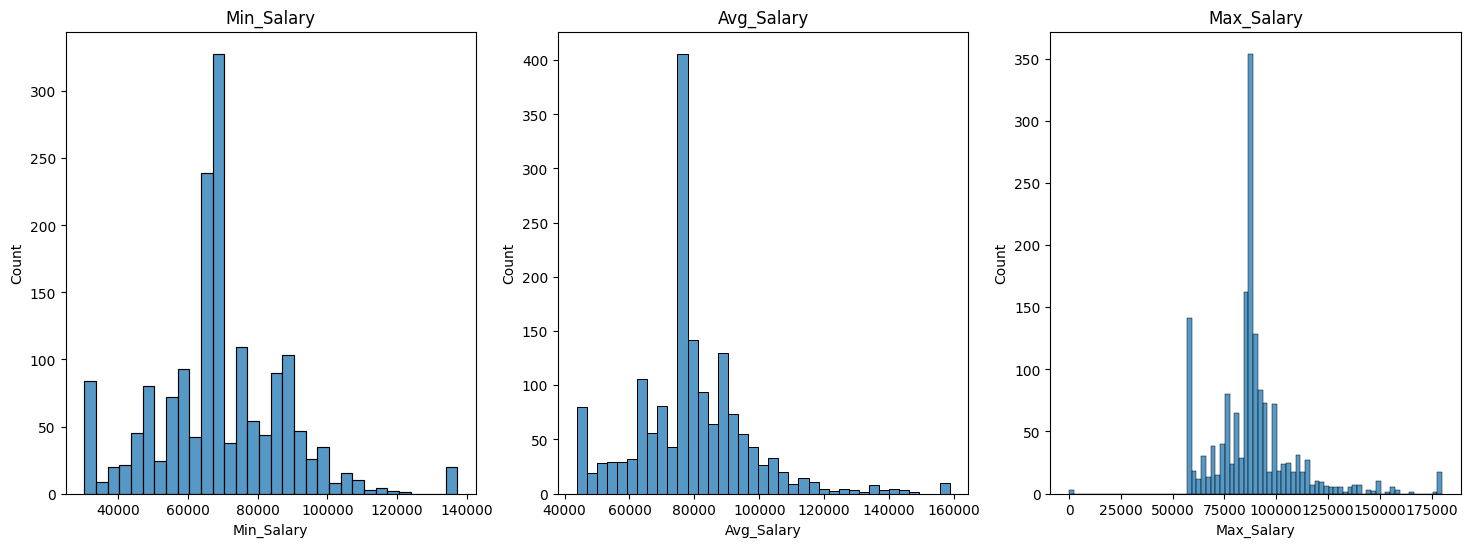

In [122]:
#from the graph we can see there is outlier and invalid data 


#max-salary: near 0 value

#min-salary: negative value and very high value
job[(job['Min_Salary']<1000) | (job['Min_Salary']>1000000)]

#on index 1773 data was written as '-87360'fix the data due to negative value
job.loc[1773, 'Min_Salary'] = 87360

#on index 1147 data was writtern as '1160000', eliminate the last 0
job.loc[1147, 'Min_Salary'] = 116000

#on index 1676 data was written as '42' fix the data into 42000
job.loc[1676, 'Min_Salary'] = 116000


#avg-salary:near 0 value
job[(job['Avg_Salary']<1000)]

#on index 1676 data was written as '62.5' fix the data into 62500
job.loc[1217, 'Avg_Salary'] = 62500

#find data that has less than 1000 salary
job[(job['Max_Salary']<1000)]

#on index 46 data was written as 57.2 fix data into 57200
job.loc[46, 'Avg_Salary'] = 57200

#on index 1132 data was written as 620 fix data into 620000
job.loc[1132, 'Avg_Salary'] = 62000

#on index 1692 data was written as 10.0 fix data into 10000
job.loc[1692, 'Avg_Salary'] = 100000

print('After Data Cleaning')

#plot data distribution
fig, ax = plt.subplots(1,3, figsize=(18,6))
for i in range(3):
    sns.histplot(data=job, x=salary[i], stat='count', ax=ax[i] )
    ax[i].set_title(salary[i])
print(job[salary].describe())

<h1>Mini Report</h1>

'Analyst' position is the highest number in the job market data.

What are the salary variations for analyst positions across different industries, and what are the top five skills most sought after by recruiters?

In [123]:
#filter the data based on position Analyst
job_analyst = job[job['Position']=='Analyst']

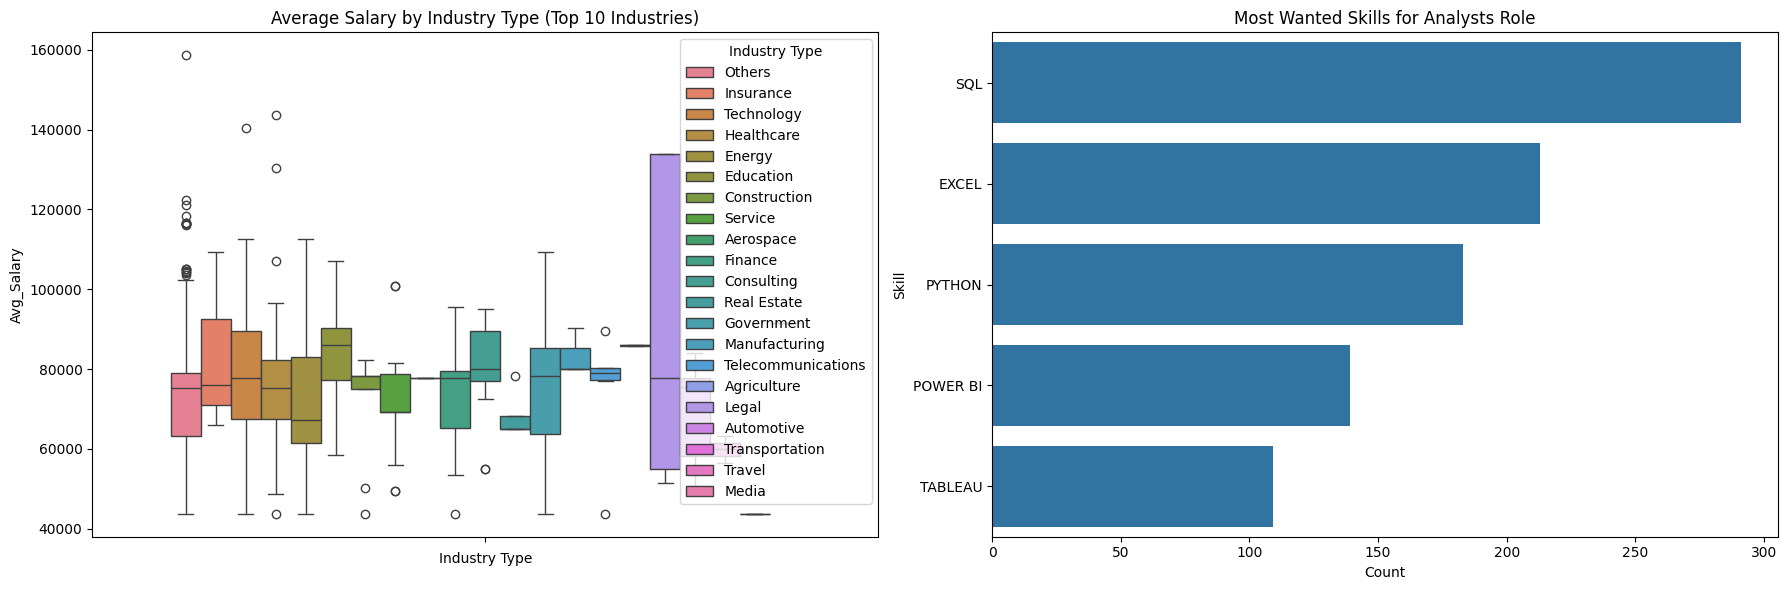

In [141]:
#to get information more on what skills needed to be an analyst, we will count the occurances of skills
fig, ax = plt.subplots(1,2, figsize=(18,6))

#create the plot for the top 5 industries
#filter and sort data based on the top 
# top_10_industries = job_analyst.groupby('Industry Type').nlargest(5).index
# filtered_data = job_analyst[job_analyst['Industry Type'].isin(top_10_industries)]
# filtered_data_sorted = filtered_data.sort_values('Industry Type')


sns.boxplot(y='Avg_Salary', data=job_analyst, hue='Industry Type', ax=ax[0])
ax[0].set_title('Average Salary by Industry Type (Top 10 Industries)')
ax[0].set_xlabel('Industry Type')
#ax[0].xticks(rotation=45)  # Rotate the x labels for better readability



#create plot for the top skills
#split and flatten the 'skill_clean' column into individual skills
all_skills = job_analyst['skill_clean'].explode()

#count the occurrences of each skill
skill_counts = all_skills.value_counts()



#display the most mentioned skills
sns.barplot(y=skill_counts.index[:5], x=skill_counts.values[:5],ax=ax[1])
ax[1].set_title('Most Wanted Skills for Analysts Role')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Skill')

plt.tight_layout()
plt.show()

In [208]:
industry_worktype

Work Type,Hybrid,In-Person,Remote
Industry Type,,,
Aerospace,NaN,77750.000000,NaN
Agriculture,NaN,85903.750000,NaN
Automotive,NaN,69199.733333,NaN
Construction,NaN,71120.031111,NaN
Consulting,NaN,79964.000000,77500.000000
Education,NaN,85580.697778,NaN
Energy,83522.500,70940.661818,NaN
Finance,75361.795,73322.812432,NaN
Government,NaN,72232.084000,93762.500000


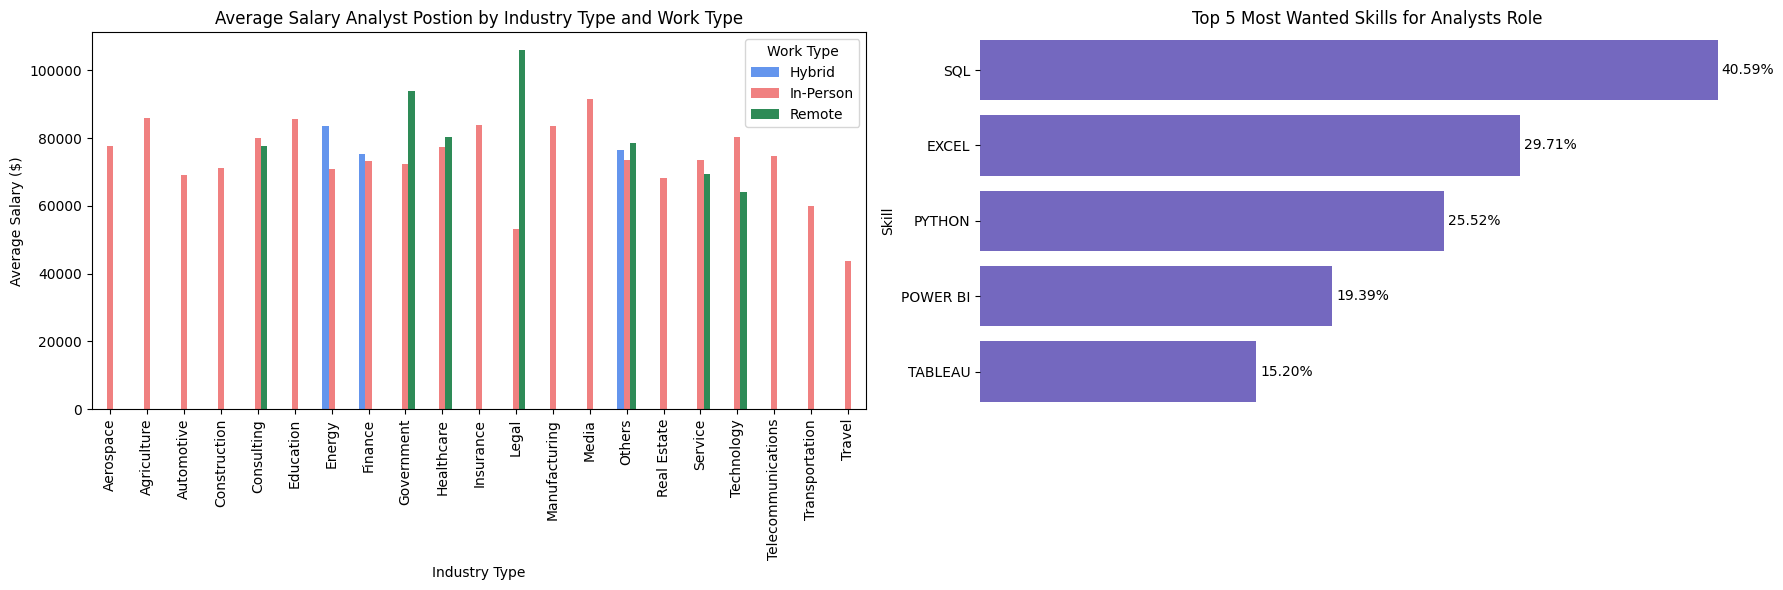

In [216]:
#to get information more on what skills needed to be an analyst, we will count the occurances of skills
fig, ax = plt.subplots(1,2, figsize=(18,6))

#pivot the table to get the average salary 
industry_worktype = job_analyst.groupby(['Industry Type', 'Work Type'])['Avg_Salary'].mean().unstack()
industry_worktype.plot(kind='bar', stacked=False, ax=ax[0], color=['cornflowerblue', 'lightcoral','seagreen'])
ax[0].set_title("Average Salary Analyst Postion by Industry Type and Work Type")
ax[0].set_xlabel('Industry Type')
ax[0].set_ylabel('Average Salary ($)')




#create plot for the top skills
#split and flatten the 'skill_clean' column into individual skills
all_skills = job_analyst['skill_clean'].explode()

#count the occurrences of each skill
skill_counts = all_skills.value_counts()



#display the most mentioned skills
sns.barplot(y=skill_counts.index[:5], x=skill_counts.values[:5]/len(job_analyst)*100,ax=ax[1], color='slateblue')
for i, v in enumerate(skill_counts.values[:5]/len(job_analyst)*100):
    ax[1].text(v + 0.2, i, f'{v:.2f}%', va='center')

ax[1].set_title('Top 5 Most Wanted Skills for Analysts Role')
#ax[1].set_xlabel('Count')
ax[1].set_ylabel('Skill')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].get_xaxis().set_ticks([])

plt.tight_layout()
plt.show()

In [219]:
len(job_analyst)/len(job)

0.43037214885954383

In [228]:
len(skill_counts)›

264

In [220]:
industry_worktype

Work Type,Hybrid,In-Person,Remote
Industry Type,,,
Aerospace,NaN,77750.000000,NaN
Agriculture,NaN,85903.750000,NaN
Automotive,NaN,69199.733333,NaN
Construction,NaN,71120.031111,NaN
Consulting,NaN,79964.000000,77500.000000
Education,NaN,85580.697778,NaN
Energy,83522.500,70940.661818,NaN
Finance,75361.795,73322.812432,NaN
Government,NaN,72232.084000,93762.500000


outline:

-43% job market is looking for analyst.  
-which industries pay highest based on work type
remote:105875 in legal industry
in-person: 91520 in media
hybrid: 83522.5 in energy

-which skills most required for analyst position



<Axes: xlabel='Industry Type'>

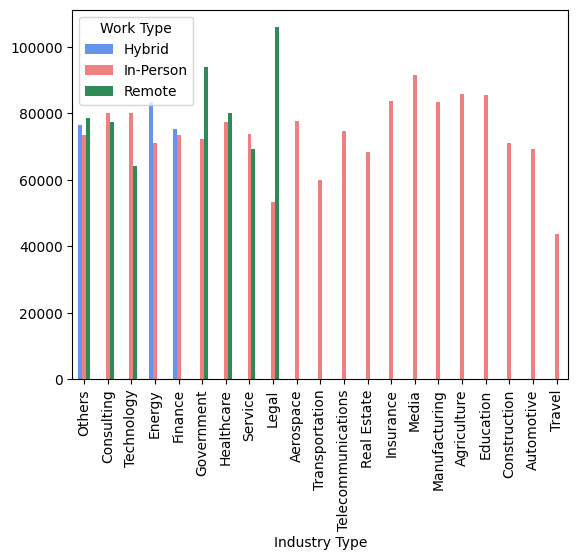

In [218]:
# Count the number of non-NaN values per row
completeness_order = industry_worktype.notna().sum(axis=1)

# Sort the DataFrame based on completeness (number of non-NaN values)
industry_worktype_sorted = industry_worktype.loc[completeness_order.sort_values(ascending=False).index]

# Plot the sorted DataFrame
industry_worktype_sorted.plot(kind='bar', stacked=False,  color=['cornflowerblue', 'lightcoral', 'seagreen'])


In [ ]:
#to get information more on what skills needed to be an analyst, we will count the occurances of skills
fig, ax = plt.subplots(1,2, figsize=(18,6))

#create the plot for the top 5 industries
#filter and sort data based on the top 
# top_10_industries = job_analyst.groupby('Industry Type').nlargest(5).index
# filtered_data = job_analyst[job_analyst['Industry Type'].isin(top_10_industries)]
# filtered_data_sorted = filtered_data.sort_values('Industry Type')


sns.boxplot(x='Industry Type',y='Avg_Salary', data=job_analyst, ax=ax[0])
ax[0].set_title('Average Salary by Industry Type (Top 10 Industries)')
ax[0].set_xlabel('Average Salary')
ax[0].set_xticks(range(len(job_analyst['Industry Type'].unique())))  # Set ticks based on the number of unique categories
ax[0].set_xticklabels(job_analyst['Industry Type'].unique(), rotation=45)  # Set labels with rotation




#create plot for the top skills
#split and flatten the 'skill_clean' column into individual skills
all_skills = job_analyst['skill_clean'].explode()

#count the occurrences of each skill
skill_counts = all_skills.value_counts()



#display the most mentioned skills
sns.barplot(y=skill_counts.index[:5], x=skill_counts.values[:5],ax=ax[1])
ax[1].set_title('Most Wanted Skills for Analysts Role')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Skill')

plt.tight_layout()
plt.show()

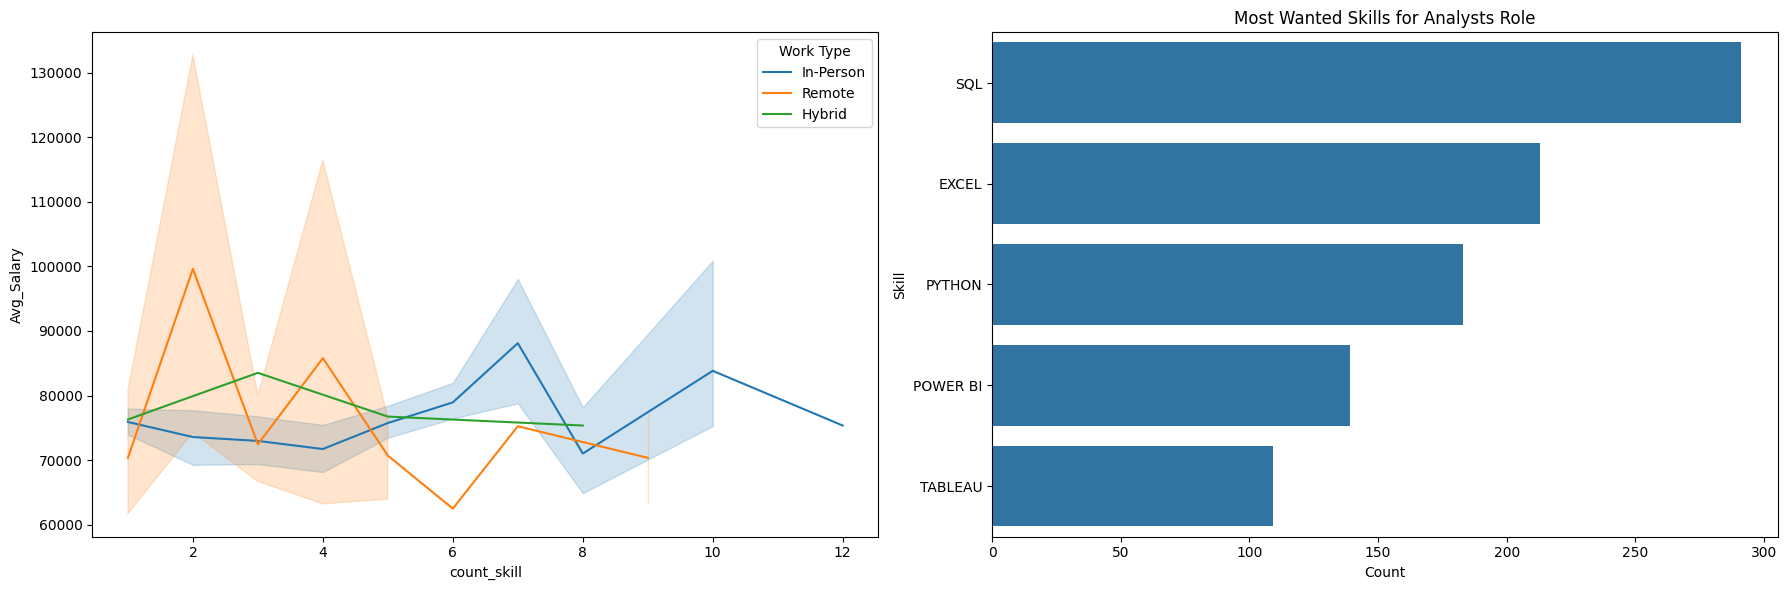

In [160]:
#to get information more on what skills needed to be an analyst, we will count the occurances of skills
fig, ax = plt.subplots(1,2, figsize=(18,6))

#create the plot for the top 5 industries
#filter and sort data based on the top 
# top_10_industries = job_analyst.groupby('Industry Type').nlargest(5).index
# filtered_data = job_analyst[job_analyst['Industry Type'].isin(top_10_industries)]
# filtered_data_sorted = filtered_data.sort_values('Industry Type')


sns.lineplot(x='count_skill',y='Avg_Salary', data=job_analyst, ax=ax[0], hue='Work Type')
# ax[0].set_title('Average Salary by Industry Type (Top 10 Industries)')
# ax[0].set_xlabel('Average Salary')
# ax[0].set_xticks(range(len(job_analyst['Industry Type'].unique())))  # Set ticks based on the number of unique categories
# ax[0].set_xticklabels(job_analyst['Industry Type'].unique(), rotation=45)  # Set labels with rotation
# #



#create plot for the top skills
#split and flatten the 'skill_clean' column into individual skills
all_skills = job_analyst['skill_clean'].explode()

#count the occurrences of each skill
skill_counts = all_skills.value_counts()



#display the most mentioned skills
sns.barplot(y=skill_counts.index[:5], x=skill_counts.values[:5],ax=ax[1])
ax[1].set_title('Most Wanted Skills for Analysts Role')
ax[1].set_xlabel('Count')
ax[1].set_ylabel('Skill')

plt.tight_layout()
plt.show()

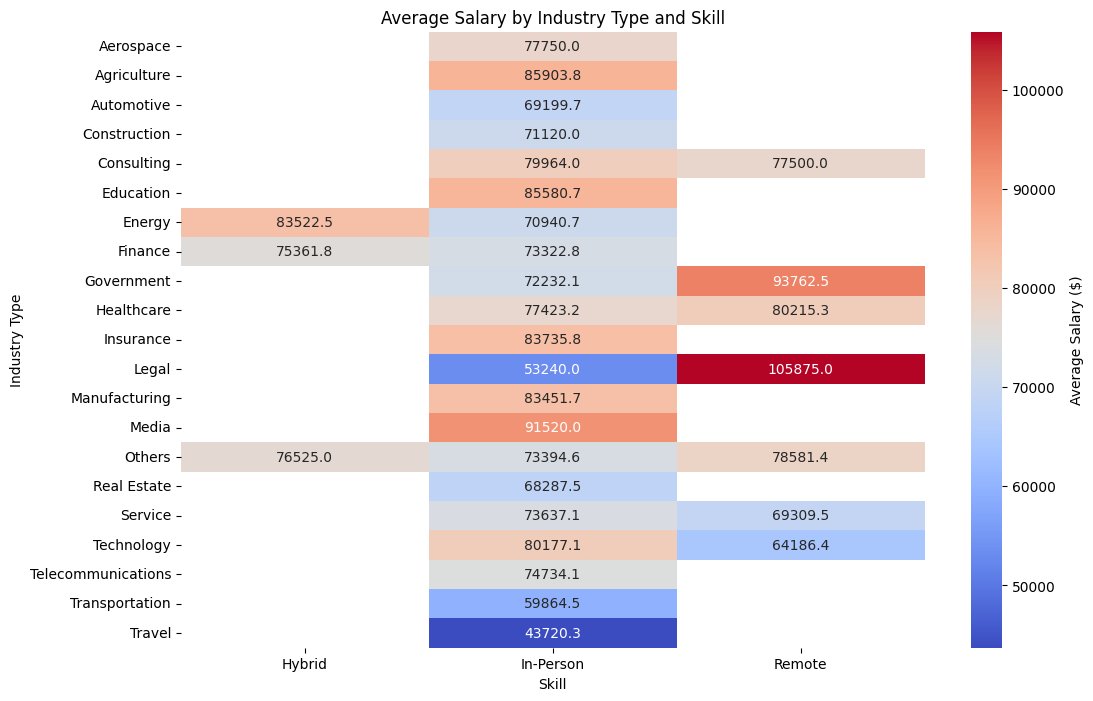

In [166]:
heatmap_data = job_analyst.pivot_table(values='Avg_Salary', index='Industry Type', columns='Work Type', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Average Salary ($)'})
plt.title('Average Salary by Industry Type and Skill')
plt.xlabel('Skill')
plt.ylabel('Industry Type')
plt.show()

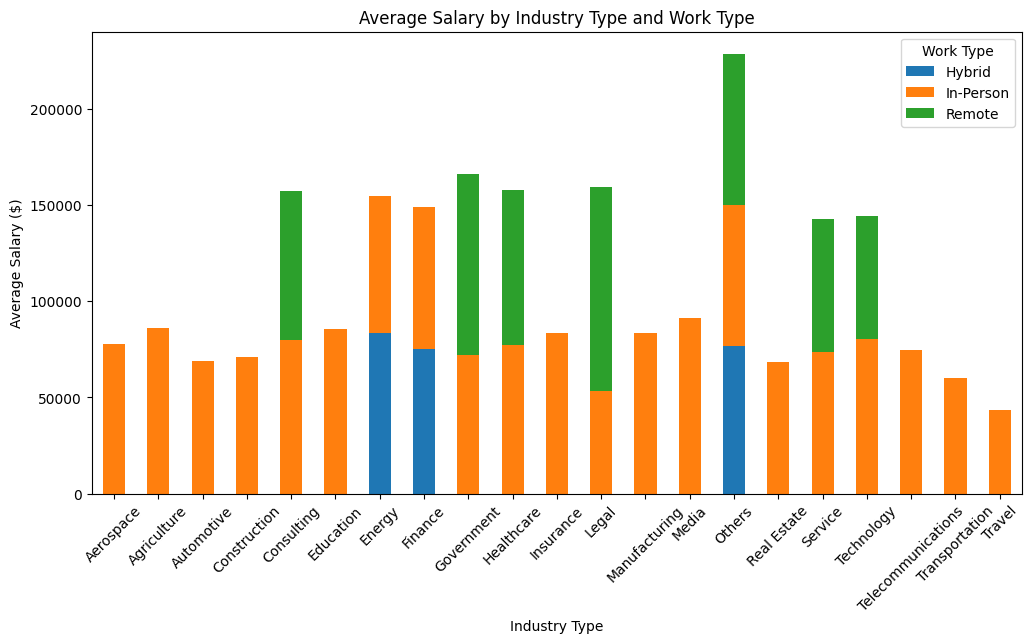

In [180]:
industry_worktype = job_analyst.groupby(['Industry Type', 'Work Type'])['Avg_Salary'].mean().unstack()
industry_worktype.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Salary by Industry Type and Work Type')
plt.xlabel('Industry Type')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=45)
plt.legend(title='Work Type')
plt.show()

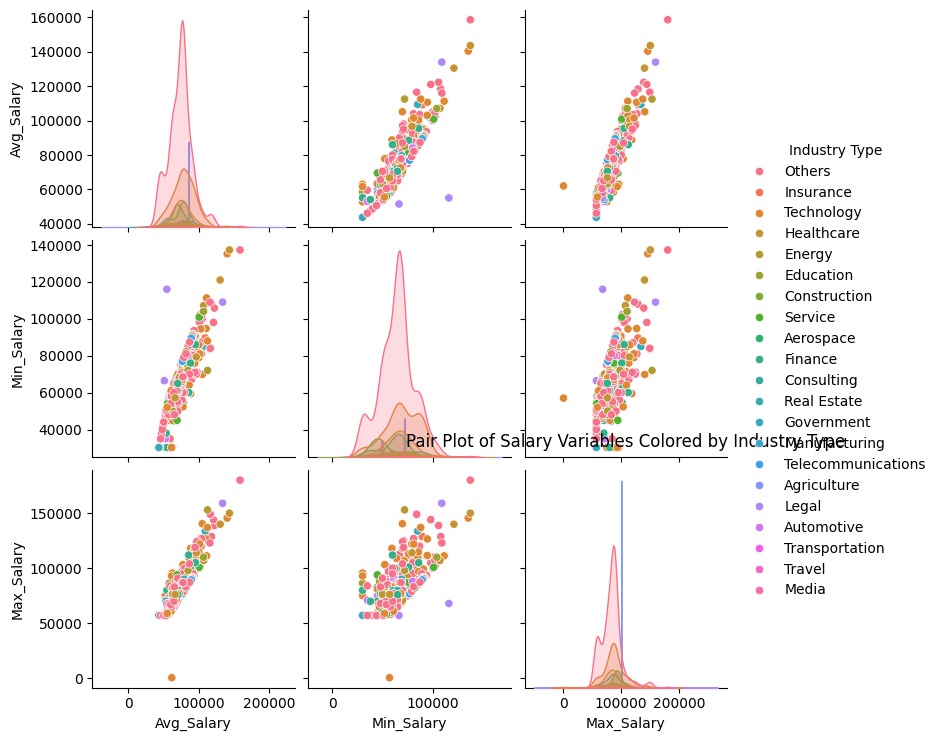

In [168]:
sns.pairplot(job_analyst, hue='Industry Type', vars=['Avg_Salary', 'Min_Salary', 'Max_Salary'])
plt.title('Pair Plot of Salary Variables Colored by Industry Type')
plt.show()

/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_37884/1029213226.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Work Type', y='Avg_Salary', data=job, palette='Set2', ci=None)
/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_37884/1029213226.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Work Type', y='Avg_Salary', data=job, palette='Set2', ci=None)


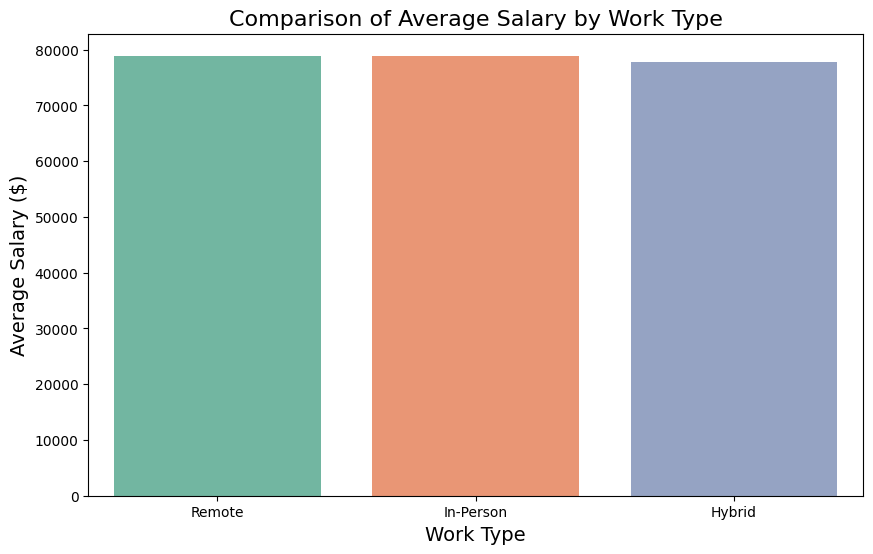

In [175]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Work Type', y='Avg_Salary', data=job, palette='Set2', ci=None)
plt.title('Comparison of Average Salary by Work Type', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.show()

/var/folders/9f/klpz4yzx3hq9bcs22_drg0740000gn/T/ipykernel_37884/1982157076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Position', y='Avg_Salary', data=job, palette='Blues')


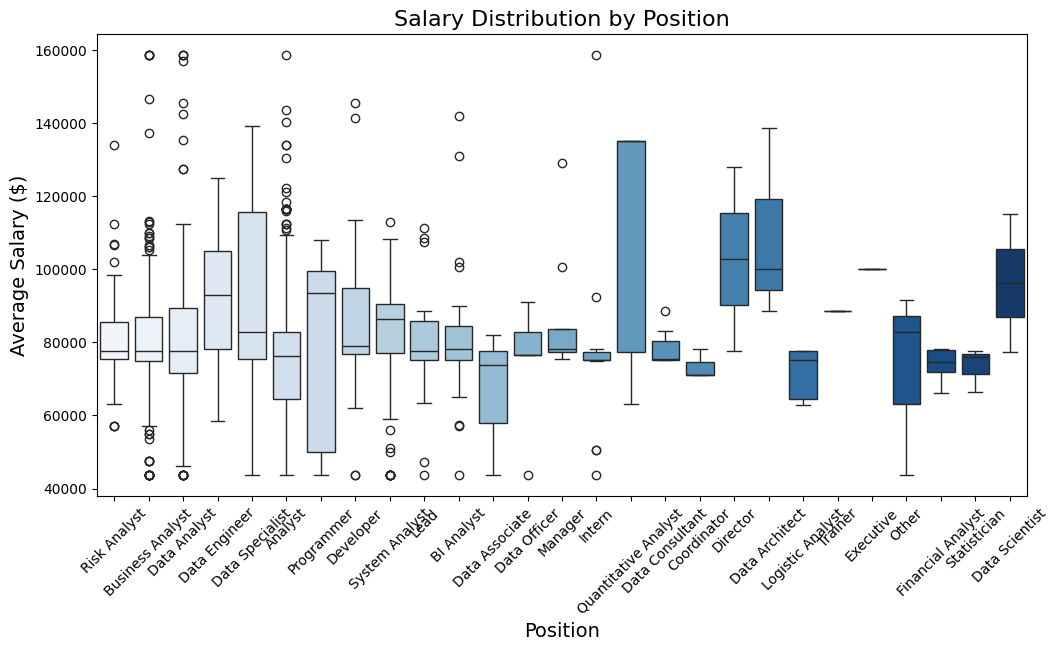

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Avg_Salary', data=job, palette='Blues')
plt.title('Salary Distribution by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Average Salary ($)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

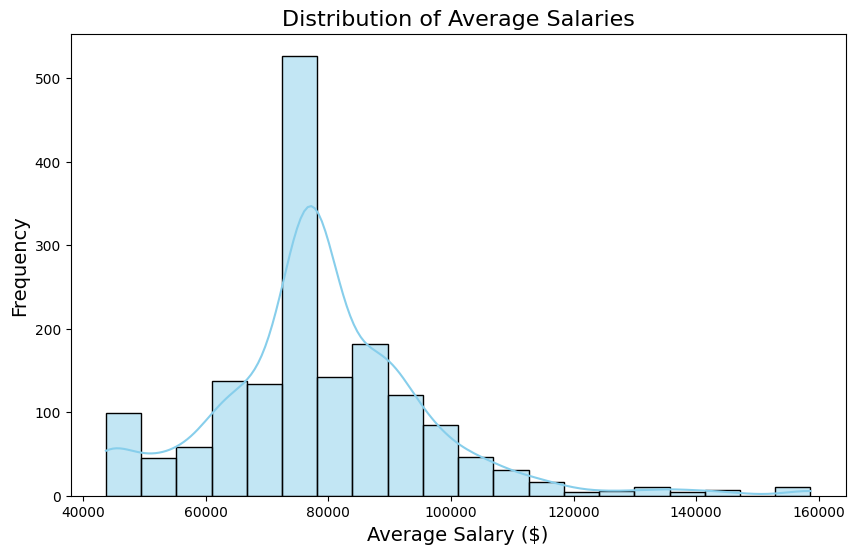

In [177]:
plt.figure(figsize=(10, 6))
sns.histplot(job['Avg_Salary'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Average Salaries', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

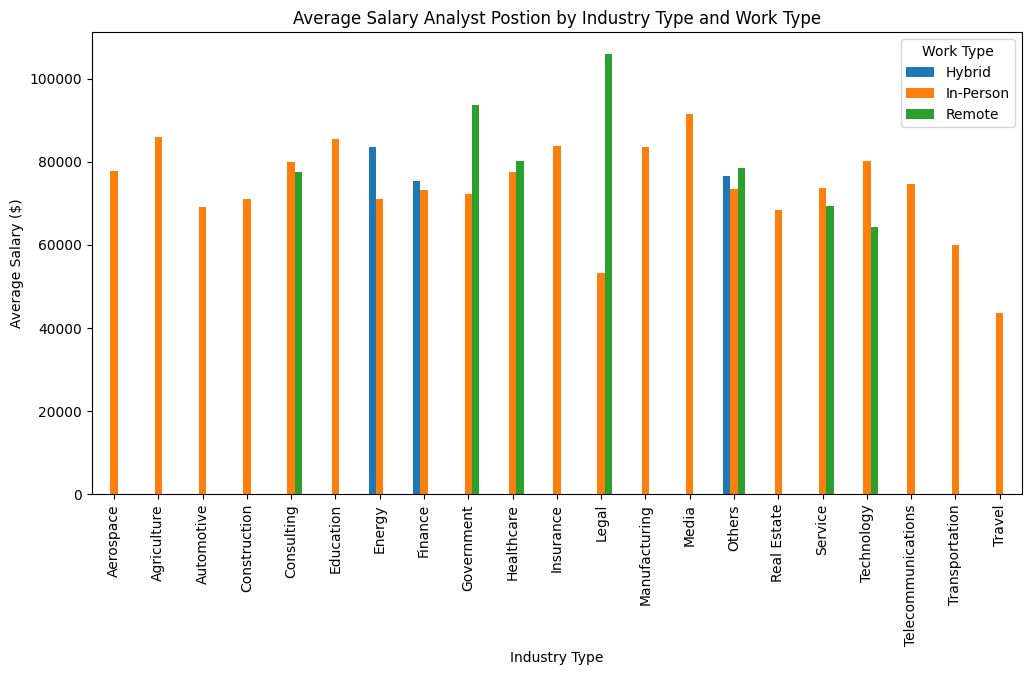

In [188]:
industry_worktype = job_analyst.groupby(['Industry Type', 'Work Type'])['Avg_Salary'].mean().unstack()
industry_worktype.plot(kind='bar', stacked=False, ax=ax[0])
plt.title("Average Salary Analyst Postion by Industry Type and Work Type")
plt.xlabel('Industry Type')
plt.ylabel('Average Salary ($)')
plt.xticks(rotation=90)
plt.legend(title='Work Type')
plt.show()